In [109]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                           roc_auc_score, roc_curve, precision_recall_curve)

import warnings
warnings.filterwarnings('ignore')


plt.style.use('default')
sns.set_palette("Set2")




In [110]:
   train_df = pd.read_csv('/content/au_train.csv')


   test_df = pd.read_csv('/content/au_test.csv')

In [111]:
print("Understanding the Dataset")
print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")

Understanding the Dataset
Training set shape: (32561, 15)
Test set shape: (16281, 15)


In [112]:
train_df.head()



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [113]:
print("Basic statistics for numerical columns:")
train_df.describe()

Basic statistics for numerical columns:


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [114]:
target_counts = train_df['class'].value_counts()
print(target_counts)

class
<=50K    24720
>50K      7841
Name: count, dtype: int64


In [115]:
print(f"Percentage: {target_counts / len(train_df) * 100}")
print()

Percentage: class
<=50K    75.919044
>50K     24.080956
Name: count, dtype: float64



In [116]:
print(train_df.dtypes)


age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object


In [117]:
missing_values = train_df.isnull().sum()
print("Missing values per column:")
for col, missing in missing_values.items():
    if missing > 0:
        print(f"  {col}: {missing} ({missing/len(train_df)*100:.1f}%)")

if missing_values.sum() == 0:
    print("   No missing values found!")
print()


Missing values per column:
   No missing values found!



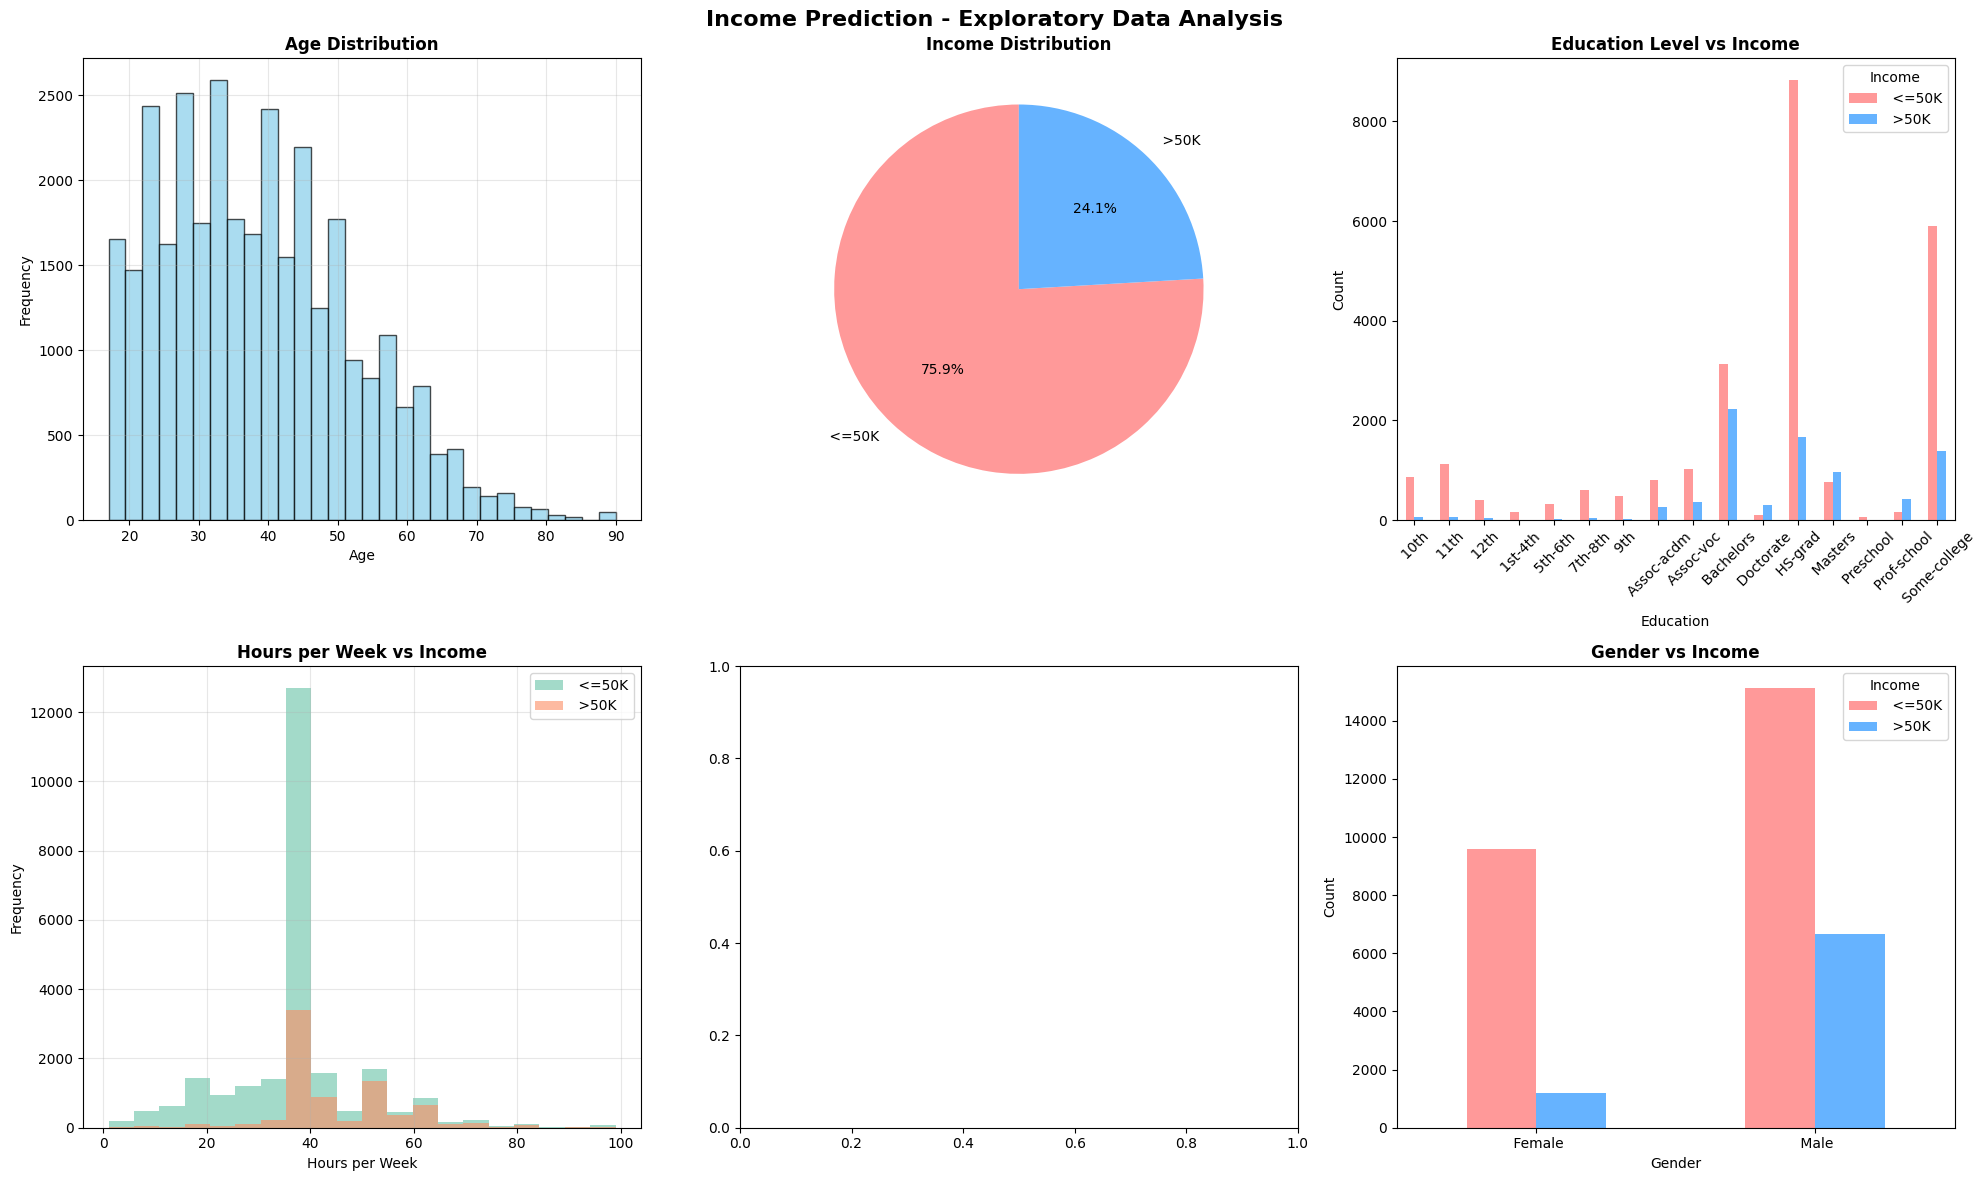

In [118]:
def create_eda_plots():

    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('Income Prediction - Exploratory Data Analysis', fontsize=16, weight='bold')

    # Plot 1: Age distribution
    axes[0,0].hist(train_df['age'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,0].set_title('Age Distribution', fontsize=12, weight='bold')
    axes[0,0].set_xlabel('Age')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].grid(True, alpha=0.3)

    # Plot 2: Income distribution (pie chart)
    income_counts = train_df['class'].value_counts()
    colors = ['#ff9999', '#66b3ff']
    axes[0,1].pie(income_counts.values, labels=income_counts.index, autopct='%1.1f%%',
                 colors=colors, startangle=90)
    axes[0,1].set_title('Income Distribution', fontsize=12, weight='bold')

    # Plot 3: Education vs Income
    education_income = pd.crosstab(train_df['education'], train_df['class'])
    education_income.plot(kind='bar', ax=axes[0,2], color=['#ff9999', '#66b3ff'])
    axes[0,2].set_title('Education Level vs Income', fontsize=12, weight='bold')
    axes[0,2].set_xlabel('Education')
    axes[0,2].set_ylabel('Count')
    axes[0,2].tick_params(axis='x', rotation=45)
    axes[0,2].legend(title='Income')

    # Plot 4: Work hours vs Income
    for income_class in train_df['class'].unique():
        subset = train_df[train_df['class'] == income_class]['hours-per-week']
        axes[1,0].hist(subset, bins=20, alpha=0.6, label=income_class)
    axes[1,0].set_title('Hours per Week vs Income', fontsize=12, weight='bold')
    axes[1,0].set_xlabel('Hours per Week')
    axes[1,0].set_ylabel('Frequency')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)



    # Plot 6: Gender vs Income
    gender_income = pd.crosstab(train_df['sex'], train_df['class'])
    gender_income.plot(kind='bar', ax=axes[1,2], color=['#ff9999', '#66b3ff'])
    axes[1,2].set_title('Gender vs Income', fontsize=12, weight='bold')
    axes[1,2].set_xlabel('Gender')
    axes[1,2].set_ylabel('Count')
    axes[1,2].tick_params(axis='x', rotation=0)
    axes[1,2].legend(title='Income')

    plt.tight_layout()
    plt.show()



# Create EDA plots
create_eda_plots()

In [119]:
print("  Data Preprocessing")

  Data Preprocessing


In [120]:
train_processed = train_df.copy()
test_processed = test_df.copy()

In [121]:
print("• Checking for '?' values (missing data markers)...")
for col in train_processed.columns:
    question_marks = (train_processed[col] == '?').sum()
    if question_marks > 0:
        print(f"  {col}: {question_marks} '?' values found")
        # Replace '?' with mode for categorical, median for numerical
        if train_processed[col].dtype == 'object':
            mode_val = train_processed[train_processed[col] != '?'][col].mode()[0]
            train_processed[col] = train_processed[col].replace('?', mode_val)
            test_processed[col] = test_processed[col].replace('?', mode_val)
        else:
            median_val = train_processed[train_processed[col] != '?'][col].median()
            train_processed[col] = train_processed[col].replace('?', median_val)
            test_processed[col] = test_processed[col].replace('?', median_val)

print("Missing values handled!")


• Checking for '?' values (missing data markers)...
Missing values handled!


In [122]:
print("\n• Separating features and target variable...")
X_train = train_processed.drop('class', axis=1)
y_train = train_processed['class']
X_test = test_processed.drop('class', axis=1)
y_test = test_processed['class']



• Separating features and target variable...


In [123]:
print(f"  Features shape: {X_train.shape}")
print(f"  Target shape: {y_train.shape}")


  Features shape: (32561, 14)
  Target shape: (32561,)


In [124]:
# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [125]:
print(f"\n• Categorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"• Numerical columns ({len(numerical_cols)}): {numerical_cols}")


• Categorical columns (8): ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
• Numerical columns (6): ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [126]:
print("  Feature Engineering")
print("="*50)

# Encode categorical variables
print("• Encoding categorical variables...")
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))
    label_encoders[col] = le
    print(f"  {col}: {len(le.classes_)} unique categories")

  Feature Engineering
• Encoding categorical variables...
  workclass: 9 unique categories
  education: 16 unique categories
  marital-status: 7 unique categories
  occupation: 15 unique categories
  relationship: 6 unique categories
  race: 5 unique categories
  sex: 2 unique categories
  native-country: 42 unique categories


In [127]:
print("\n• Encoding target variable...")
target_encoder = LabelEncoder()
y_train_encoded = target_encoder.fit_transform(y_train)
y_test_encoded = target_encoder.fit_transform(y_test)

print(f"  Target classes: {target_encoder.classes_}")
print(f"  Encoded as: {[0, 1]}")

# Scale numerical features



• Encoding target variable...
  Target classes: [' <=50K.' ' >50K.']
  Encoded as: [0, 1]


In [128]:
# Scale numerical features
print("\n• Scaling numerical features...")
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

print(" Feature engineering completed!")
print(f"  Final training set shape: {X_train_scaled.shape}")
print(f"  Final test set shape: {X_test_scaled.shape}")



• Scaling numerical features...
 Feature engineering completed!
  Final training set shape: (32561, 14)
  Final test set shape: (16281, 14)


In [129]:
print("  Model Training")
print("="*50)

# Define models to train
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100)
}

# Train models and store results
model_results = {}

print(" Training models...")
for name, model in models.items():
    print(f"\n• Training {name}...")

    # Train the model
    model.fit(X_train_scaled, y_train_encoded)

    # Make predictions
    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)

    # Calculate metrics
    train_accuracy = accuracy_score(y_train_encoded, train_pred)
    test_accuracy = accuracy_score(y_test_encoded, test_pred)

    # For ROC AUC, we need prediction probabilities
    if hasattr(model, 'predict_proba'):
        test_proba = model.predict_proba(X_test_scaled)[:, 1]
        roc_auc = roc_auc_score(y_test_encoded, test_proba)
    else:
        roc_auc = roc_auc_score(y_test_encoded, test_pred)

    # Store results
    model_results[name] = {
        'model': model,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'roc_auc': roc_auc,
        'predictions': test_pred
    }

    print(f" Training Accuracy: {train_accuracy:.4f}")
    print(f"     Test Accuracy: {test_accuracy:.4f}")
    print(f"     ROC AUC: {roc_auc:.4f}")

print("\Training completed!")


  Model Training
 Training models...

• Training Logistic Regression...
 Training Accuracy: 0.8251
     Test Accuracy: 0.8245
     ROC AUC: 0.8509

• Training Random Forest...
 Training Accuracy: 1.0000
     Test Accuracy: 0.8533
     ROC AUC: 0.9051

• Training Gradient Boosting...
 Training Accuracy: 0.8682
     Test Accuracy: 0.8680
     ROC AUC: 0.9200
\Training completed!


In [130]:
print("\n STEP 8: Model Evaluation")
print("="*50)

# Compare models
print(" Model Comparison:")
print("-" * 70)
print(f"{'Model':<20} {'Train Acc':<12} {'Test Acc':<12} {'ROC AUC':<12}")
print("-" * 70)

best_model_name = None
best_score = 0

for name, results in model_results.items():
    train_acc = results['train_accuracy']
    test_acc = results['test_accuracy']
    roc_auc = results['roc_auc']

    print(f"{name:<20} {train_acc:<12.4f} {test_acc:<12.4f} {roc_auc:<12.4f}")

    # Track best model based on test accuracy
    if test_acc > best_score:
        best_score = test_acc
        best_model_name = name

print("-" * 70)
print(f" Best Model: {best_model_name} (Test Accuracy: {best_score:.4f})")

# Detailed evaluation of best model
best_model = model_results[best_model_name]['model']
best_predictions = model_results[best_model_name]['predictions']

print(f" Detailed Evaluation - {best_model_name}")
print("="*50)

# Classification Report
print(" Classification Report:")
print(classification_report(y_test_encoded, best_predictions,
                          target_names=target_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test_encoded, best_predictions)
print("\n Confusion Matrix:")
print("    Predicted")
print("      0    1")
print(f"  0  {cm[0,0]:4d} {cm[0,1]:4d}")
print(f"  1  {cm[1,0]:4d} {cm[1,1]:4d}")
print("Actual")



 STEP 8: Model Evaluation
 Model Comparison:
----------------------------------------------------------------------
Model                Train Acc    Test Acc     ROC AUC     
----------------------------------------------------------------------
Logistic Regression  0.8251       0.8245       0.8509      
Random Forest        1.0000       0.8533       0.9051      
Gradient Boosting    0.8682       0.8680       0.9200      
----------------------------------------------------------------------
 Best Model: Gradient Boosting (Test Accuracy: 0.8680)
 Detailed Evaluation - Gradient Boosting
 Classification Report:
              precision    recall  f1-score   support

      <=50K.       0.88      0.95      0.92     12435
       >50K.       0.79      0.59      0.68      3846

    accuracy                           0.87     16281
   macro avg       0.84      0.77      0.80     16281
weighted avg       0.86      0.87      0.86     16281


 Confusion Matrix:
    Predicted
      0    1
  0  11

  Results Visualization


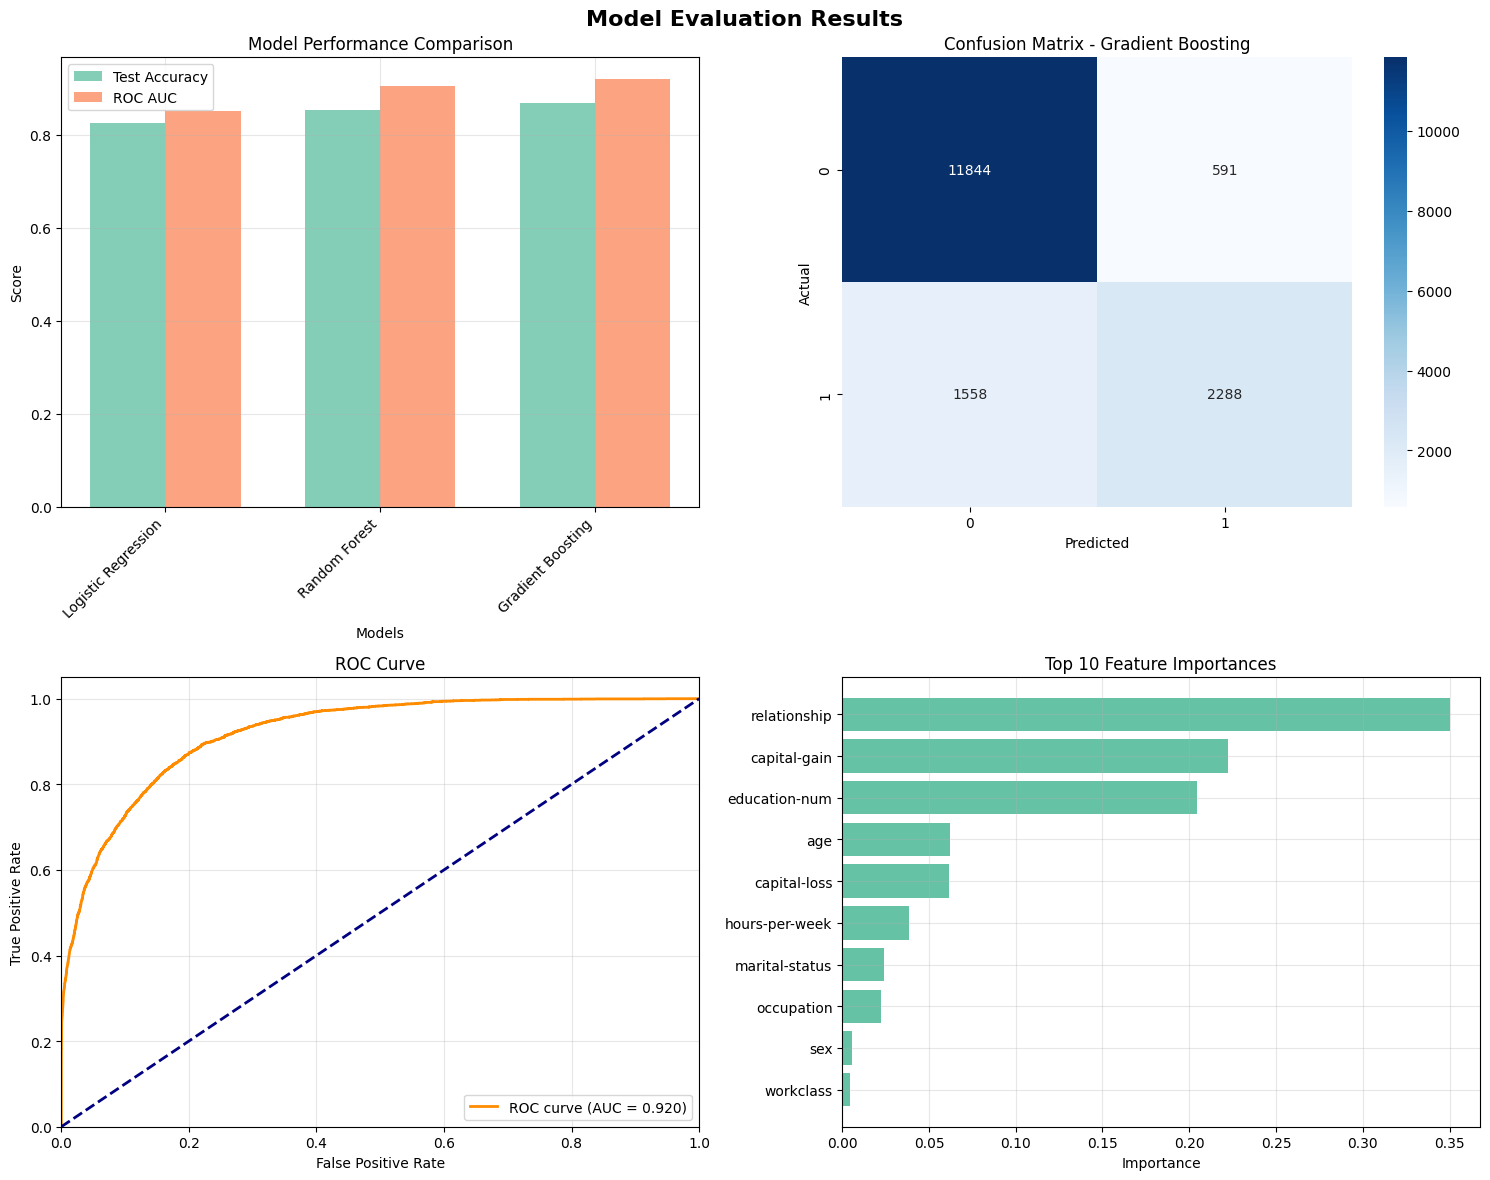


 STEP 10: Key Insights & Conclusions
Model Performance Summary:
• Best performing model: Gradient Boosting
• Test accuracy: 86.8%
• ROC AUC: 0.920

 Business Insights:
• Top 5 most important features for income prediction:
  1. relationship: 0.350
  2. capital-gain: 0.222
  3. education-num: 0.205
  4. age: 0.062
  5. capital-loss: 0.062

 Model Reliability:
 Model shows good generalization (low overfitting)
   Training accuracy: 86.8%
   Test accuracy: 86.8%
   Difference: 0.0%

 Next Steps:
• Consider feature engineering (creating new features)
• Try hyperparameter tuning for better performance
• Collect more data if possible
• Consider ensemble methods
• Deploy the model for real-world predictions

 ANALYSIS COMPLETE!


In [131]:
print("  Results Visualization")
print("="*50)

def create_evaluation_plots():
    """Create comprehensive evaluation plots"""

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Model Evaluation Results', fontsize=16, weight='bold')

    # Plot 1: Model Comparison Bar Chart
    model_names = list(model_results.keys())
    test_accuracies = [model_results[name]['test_accuracy'] for name in model_names]
    roc_aucs = [model_results[name]['roc_auc'] for name in model_names]

    x = np.arange(len(model_names))
    width = 0.35

    axes[0,0].bar(x - width/2, test_accuracies, width, label='Test Accuracy', alpha=0.8)
    axes[0,0].bar(x + width/2, roc_aucs, width, label='ROC AUC', alpha=0.8)
    axes[0,0].set_xlabel('Models')
    axes[0,0].set_ylabel('Score')
    axes[0,0].set_title('Model Performance Comparison')
    axes[0,0].set_xticks(x)
    axes[0,0].set_xticklabels(model_names, rotation=45, ha='right')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)

    # Plot 2: Confusion Matrix Heatmap
    cm = confusion_matrix(y_test_encoded, best_predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,1])
    axes[0,1].set_title(f'Confusion Matrix - {best_model_name}')
    axes[0,1].set_xlabel('Predicted')
    axes[0,1].set_ylabel('Actual')

    # Plot 3: ROC Curve
    if hasattr(best_model, 'predict_proba'):
        y_proba = best_model.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test_encoded, y_proba)
        roc_auc = roc_auc_score(y_test_encoded, y_proba)

        axes[1,0].plot(fpr, tpr, color='darkorange', lw=2,
                      label=f'ROC curve (AUC = {roc_auc:.3f})')
        axes[1,0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        axes[1,0].set_xlim([0.0, 1.0])
        axes[1,0].set_ylim([0.0, 1.05])
        axes[1,0].set_xlabel('False Positive Rate')
        axes[1,0].set_ylabel('True Positive Rate')
        axes[1,0].set_title('ROC Curve')
        axes[1,0].legend(loc="lower right")
        axes[1,0].grid(True, alpha=0.3)

    # Plot 4: Feature Importance (if available)
    if hasattr(best_model, 'feature_importances_'):
        feature_names = X_train_scaled.columns
        importances = best_model.feature_importances_

        # Get top 10 features
        top_indices = np.argsort(importances)[-10:]
        top_features = [feature_names[i] for i in top_indices]
        top_importances = importances[top_indices]

        axes[1,1].barh(range(len(top_features)), top_importances)
        axes[1,1].set_yticks(range(len(top_features)))
        axes[1,1].set_yticklabels(top_features)
        axes[1,1].set_xlabel('Importance')
        axes[1,1].set_title('Top 10 Feature Importances')
        axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Create evaluation plots
create_evaluation_plots()

# ===========================
# STEP 10: INSIGHTS & CONCLUSIONS
# ===========================

print("\n STEP 10: Key Insights & Conclusions")
print("="*50)

print("Model Performance Summary:")
print(f"• Best performing model: {best_model_name}")
print(f"• Test accuracy: {best_score:.1%}")
print(f"• ROC AUC: {model_results[best_model_name]['roc_auc']:.3f}")

print("\n Business Insights:")
if hasattr(best_model, 'feature_importances_'):
    feature_names = X_train_scaled.columns
    importances = best_model.feature_importances_

    # Top 5 most important features
    top_indices = np.argsort(importances)[-5:]
    print("• Top 5 most important features for income prediction:")
    for i, idx in enumerate(reversed(top_indices)):
        feature_name = feature_names[idx]
        importance = importances[idx]
        print(f"  {i+1}. {feature_name}: {importance:.3f}")

print("\n Model Reliability:")
train_acc = model_results[best_model_name]['train_accuracy']
test_acc = model_results[best_model_name]['test_accuracy']
overfitting = train_acc - test_acc

if overfitting < 0.05:
    print(" Model shows good generalization (low overfitting)")
elif overfitting < 0.1:
    print("  Model shows moderate overfitting")
else:
    print(" Model shows high overfitting - consider regularization")

print(f"   Training accuracy: {train_acc:.1%}")
print(f"   Test accuracy: {test_acc:.1%}")
print(f"   Difference: {overfitting:.1%}")
print("\n Next Steps:")
print("• Consider feature engineering (creating new features)")
print("• Try hyperparameter tuning for better performance")
print("• Collect more data if possible")
print("• Consider ensemble methods")
print("• Deploy the model for real-world predictions")

print("\n" + "="*50)
print(" ANALYSIS COMPLETE!")
print("="*50)